<a href="https://colab.research.google.com/github/danon6868/blastim-ml/blob/main/statistics_day_8/%D0%9D%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F_3_%D0%94%D0%B5%D0%BD%D1%8C_8_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%9A%D0%BB%D0%B0%D1%81%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # library for working with vectors
import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization (basic)

In [3]:
plt.rcParams["figure.figsize"] = 10, 7
plt.rcParams["font.size"] = 15

np.random.seed(123321)

## Central limit theorem


We will visualize CLT using `Python`.

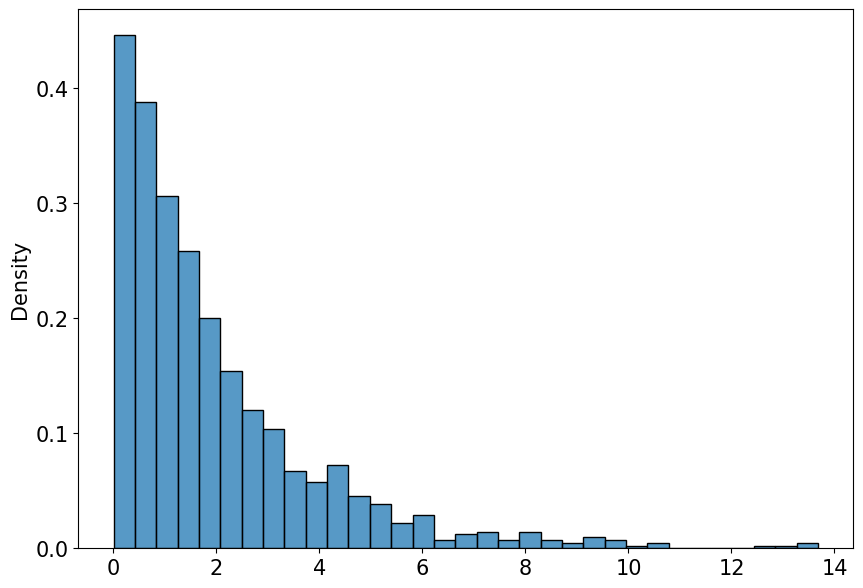

In [4]:
sample_size = 1000
sample = np.random.chisquare(2, size=(sample_size, )) # 2 что-то типа среднего

sns.histplot(sample, stat="density");

In [11]:
num_of_samples = 20
sample_means = []

for i in range(num_of_samples):
    sample = np.random.chisquare(2, size=(sample_size, ))
    sample_means.append(np.mean(sample))

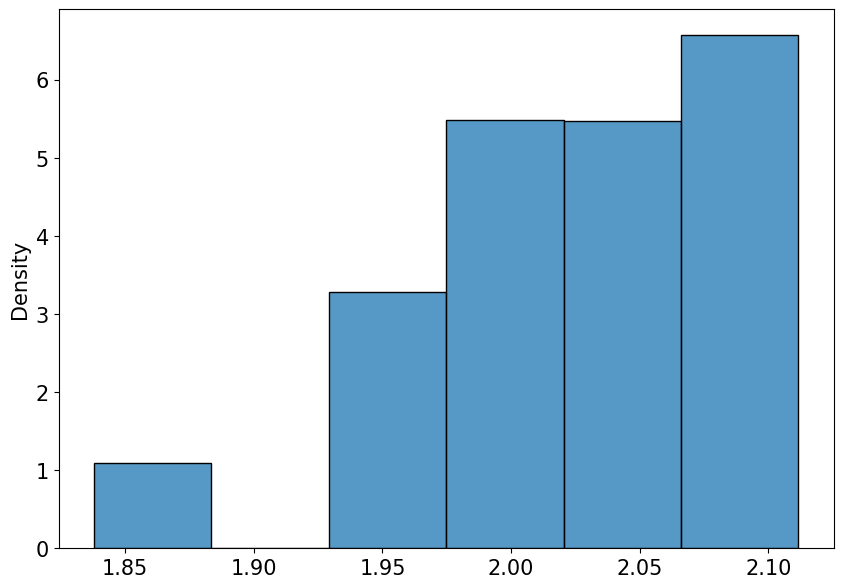

In [12]:
sns.histplot(sample_means, stat="density");

In [13]:
num_of_samples = 1000
sample_means = []

for i in range(num_of_samples):
    sample = np.random.chisquare(2, size=(sample_size, ))
    sample_means.append(np.mean(sample))

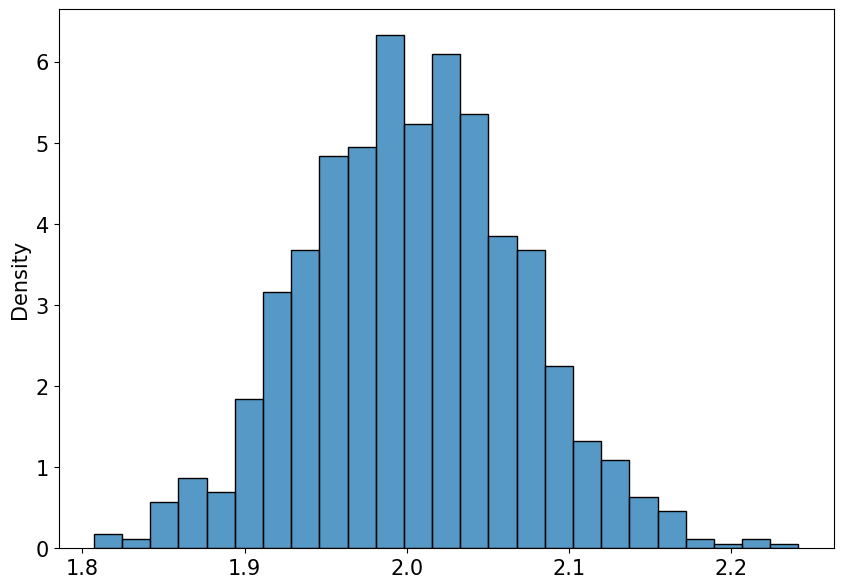

In [14]:
sns.histplot(sample_means, stat="density");

In [15]:
np.mean(sample_means)

2.00422911027465

## Standard error of the mean


$se = \frac{\sigma}{\sqrt{n}}$

In [16]:
np.std(sample_means)

0.06625936660160656

In [18]:
np.std(sample) / np.sqrt(sample_size)

0.06670975587681748

## Confidence interval

In [19]:
population = np.random.normal(180, 20, size=100000)

In [22]:
mu = population.mean()
sigma = population.std()

mu, sigma

(179.98860927289374, 20.009796741307902)

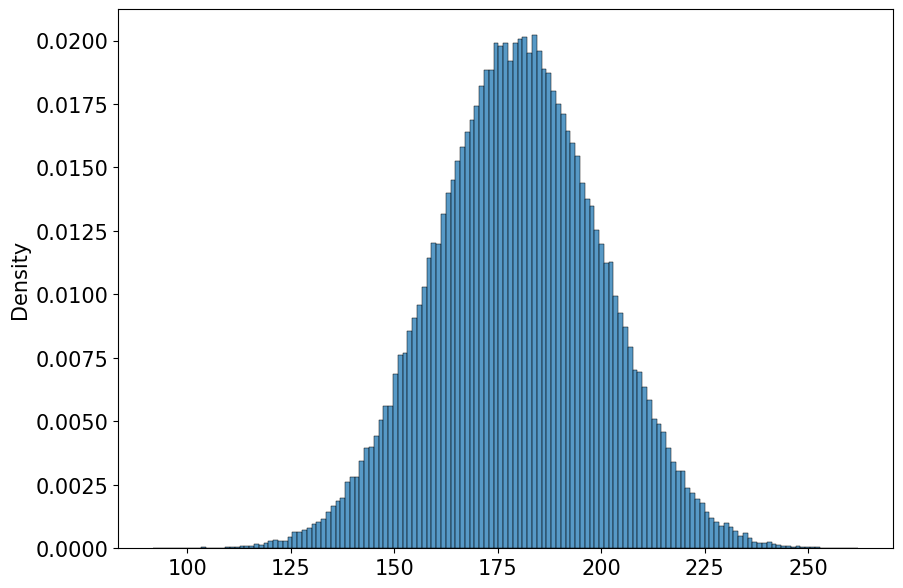

In [21]:
sns.histplot(population, stat="density");

In [23]:
means_1 = []
sample_size = 100
num_samples = 1000

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    mean = np.mean(sample)
    means_1.append(mean)

means_1 = np.array(means_1)

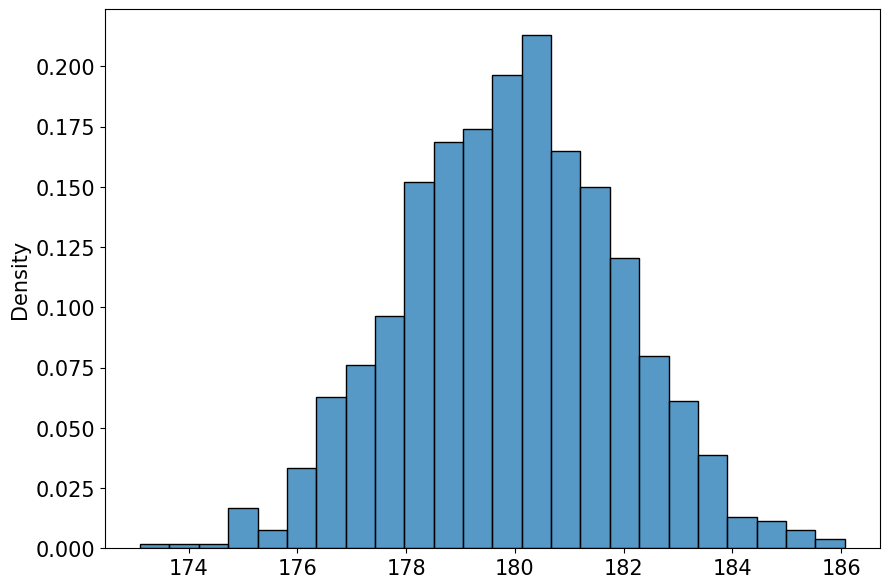

In [24]:
sns.histplot(means_1, stat="density");

In [29]:
se = sigma / np.sqrt(sample_size)
se

2.0009796741307904

In [30]:
mean_mean = means_1.mean()
left_b = mean_mean - 1.96 * se
right_b = mean_mean + 1.96 * se

left_b, right_b

(175.99600228443384, 183.83984260702655)

In [34]:
means_1 = []
sample_size = 10000
num_samples = 1000

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    mean = np.mean(sample)
    means_1.append(mean)

means_1 = np.array(means_1)

In [35]:
se = sigma / np.sqrt(sample_size)
se

0.20009796741307903

In [36]:
mean_mean = means_1.mean()
left_b = mean_mean - 1.96 * se
right_b = mean_mean + 1.96 * se

left_b, right_b

(179.5827860608646, 180.36717009312386)

## Calculate CI fairly

In [37]:
# Знаем sigma
sample_size = 100

sample = np.random.choice(population, size=sample_size)
mean = sample.mean()

se = sigma / np.sqrt(sample_size)
left_b = mean - 1.96 * se
right_b = mean + 1.96 * se

left_b, right_b

(173.12451566671456, 180.96835598930727)

In [38]:
# Не знаем sigma
std = sample.std()
se = std / np.sqrt(sample_size)
left_b = mean - 1.96 * se
right_b = mean + 1.96 * se

left_b, right_b

(173.49475496029294, 180.5981166957289)

## What does it mean, 95% CI?

In [83]:
def calculate_ci(sample, std=None):
    if std is None:
        std = sample.std()

    mean = sample.mean()
    se = std / np.sqrt(len(sample))
    left_b = mean - 1.96 * se
    right_b = mean + 1.96 * se

    return left_b, right_b

In [84]:
# Знаем sigma
sample_size = 10
outcomes = []

for i in range(1000):
    sample = np.random.choice(population, size=sample_size)
    left_b, right_b = calculate_ci(sample, std=sigma)

    outcome = (left_b < mu) & (mu < right_b)
    outcomes.append(outcome)

In [85]:
np.mean(outcomes)

0.957

In [86]:
# Не знаем sigma
sample_size = 10
outcomes = []

for i in range(1000):
    sample = np.random.choice(population, size=sample_size)
    left_b, right_b = calculate_ci(sample)

    outcome = (left_b < mu) & (mu < right_b)
    outcomes.append(outcome)

In [87]:
np.mean(outcomes)

0.901

In [88]:
def calculate_ci(sample, std=None):
    if std is None:
        std = sample.std()

    mean = sample.mean()
    se = std / np.sqrt(len(sample))
    left_b = mean - 2.353 * se
    right_b = mean + 2.353 * se

    return left_b, right_b

In [89]:
# Не знаем sigma
sample_size = 10
outcomes = []

for i in range(1000):
    sample = np.random.choice(population, size=sample_size)
    left_b, right_b = calculate_ci(sample)

    outcome = (left_b < mu) & (mu < right_b)
    outcomes.append(outcome)

In [90]:
np.mean(outcomes)

0.949